<a href="https://colab.research.google.com/github/Nielspace/MachineLearningBlogs/blob/master/Classification_Experiments_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

## Normalisation

The aim of normalisation is to bring all the values to the same scale where **mean is 0 and variance is 1**. The value might have different range like 0-10 or 100-255. In order to bring them to the same range we normalise the input data. 

**Why?**

Because when the data has lot of vaiance then the weights that is allocated to each feature can be different and when weights have variance the backpropagation for each feature will different as well which will ultimately lead to slower convergence to the global minimum. 

But when the input data is normalised weights that is allocated to each of the feature is will be of the similar range making the backpropagation smoother and faster to converge to the center of the global minima. 


**Note**: In normalisation the scaling is changed but distribution remains the same. 

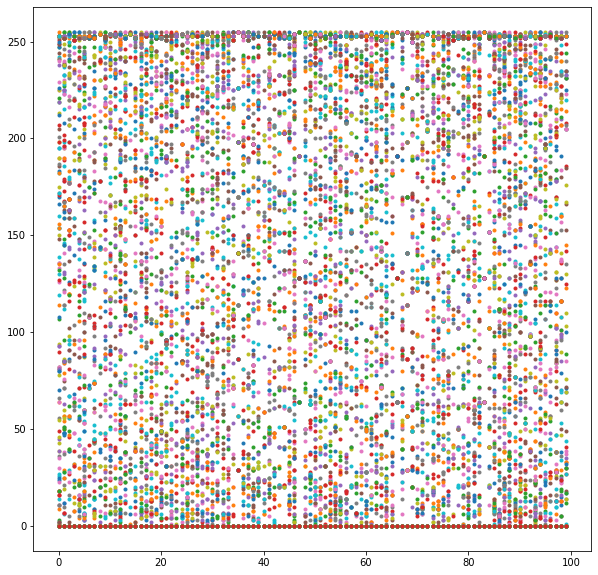

In [0]:
plt.figure(figsize=(10,10))
plt.plot(X_train[:100].reshape(100, -1), '.')
plt.show()

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

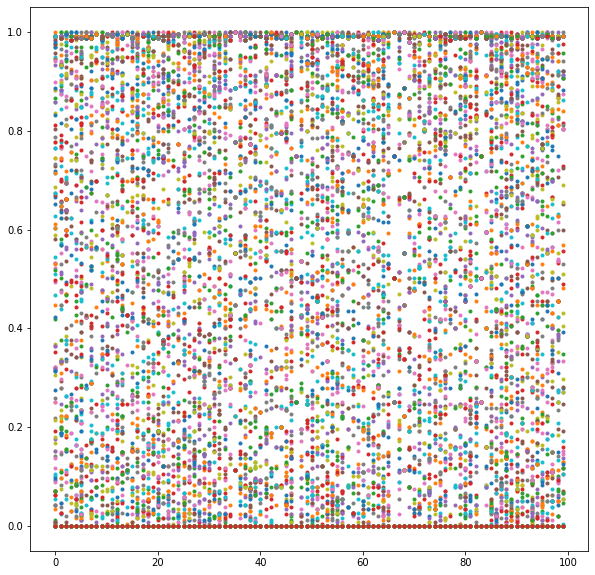

In [0]:
plt.figure(figsize=(10,10))
plt.plot(X_train[:100].reshape(100, -1), '.')
plt.show()

# Neural Network Modelling

## Simple Vanilla Neural Net with Sigmoid 


In [0]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(300, activation='sigmoid'))
model1.add(keras.layers.Dense(30, activation='sigmoid'))
model1.add(keras.layers.Dense(10, activation='softmax'))

model1.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                9030      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 244,840
Trainable params: 244,840
Non-trainable params: 0
_________________________________________________________________


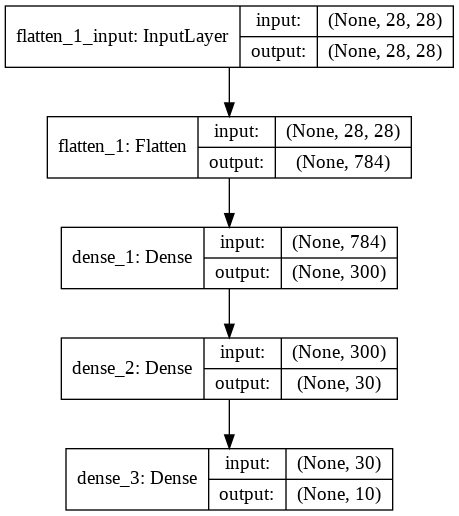

In [0]:
keras.utils.plot_model(model1, "Vanilla_model.png", show_shapes=True)

In [0]:
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])

In [0]:
history=model1.fit(X_train[:40000], y_train[:40000],
                   epochs=30, validation_data=(X_train[40000:], y_train[40000:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 20000 samples
Epoch 1/30





40000/40000 [==============================] - 13s 336us/step - loss: 2.2313 - acc: 0.2838 - val_loss: 2.1207 - val_acc: 0.4753
Epoch 2/30
40000/40000 [==============================] - 6s 145us/step - loss: 1.9543 - acc: 0.5656 - val_loss: 1.7480 - val_acc: 0.6300
Epoch 3/30
40000/40000 [==============================] - 6s 145us/step - loss: 1.5270 - acc: 0.6719 - val_loss: 1.2950 - val_acc: 0.7266
Epoch 4/30
40000/40000 [==============================] - 6s 147us/step - loss: 1.1370 - acc: 0.7461 - val_loss: 0.9785 - val_acc: 0.7898
Epoch 5/30
40000/40000 [==============================] - 6s 146us/step - loss: 0.8985 - acc: 0.7923 - val_loss: 0.7992 - val_acc: 0.8187
Epoch 6/30
40000/40000 [==============================] - 6s 147us/step - loss: 0.7574 - acc: 0.8186 - val_loss: 0.6867 - val_acc: 0.8347
Epoch 7/30
40000/40

In [0]:
model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 60us/step


[0.2907240376710892, 0.9147]

In [0]:
import pandas as pd

vanilla_sig = pd.DataFrame(history.history)
vanilla_sig.head()

,val_loss,val_acc,loss,acc
0,2.120730,0.47525,2.231344,0.283750
1,1.747988,0.63005,1.954260,0.565650
2,1.294993,0.72660,1.526957,0.671875
3,0.978514,0.78980,1.136988,0.746075
4,0.799188,0.81870,0.898475,0.792300


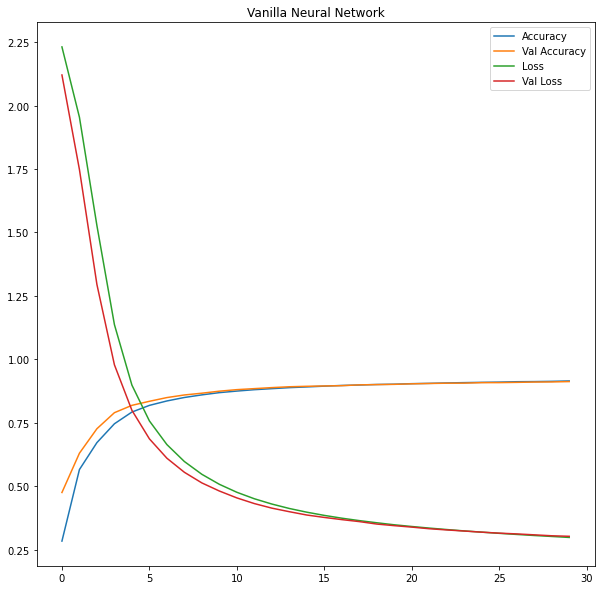

In [0]:
plt.figure(figsize=(10,10))

plt.title('Vanilla Neural Network')

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

## Vanilla Neural Network with ReLU

In [0]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28,28)))
model2.add(keras.layers.Dense(300, activation='relu'))
model2.add(keras.layers.Dense(30, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                9030      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 244,840
Trainable params: 244,840
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])


history=model2.fit(X_train[:40000], y_train[:40000],
                   epochs=30, validation_data=(X_train[40000:], y_train[40000:]))

Train on 40000 samples, validate on 20000 samples
Epoch 1/30
40000/40000 [==============================] - 6s 150us/step - loss: 0.7911 - acc: 0.7909 - val_loss: 0.3725 - val_acc: 0.8961
Epoch 2/30
40000/40000 [==============================] - 6s 144us/step - loss: 0.3298 - acc: 0.9086 - val_loss: 0.2951 - val_acc: 0.9154
Epoch 3/30
40000/40000 [==============================] - 6s 143us/step - loss: 0.2683 - acc: 0.9245 - val_loss: 0.2503 - val_acc: 0.9286
Epoch 4/30
40000/40000 [==============================] - 6s 142us/step - loss: 0.2323 - acc: 0.9340 - val_loss: 0.2357 - val_acc: 0.9338
Epoch 5/30
40000/40000 [==============================] - 6s 143us/step - loss: 0.2054 - acc: 0.9417 - val_loss: 0.2054 - val_acc: 0.9407
Epoch 6/30
40000/40000 [==============================] - 6s 147us/step - loss: 0.1840 - acc: 0.9484 - val_loss: 0.1988 - val_acc: 0.9424
Epoch 7/30
40000/40000 [==============================] - 6s 148us/step - loss: 0.1668 - acc: 0.9523 - val_loss: 0.1780 - 

In [0]:
model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/step


[0.08238641495890915, 0.9756]

In [0]:
import pandas as pd

vanilla_relu = pd.DataFrame(history.history)
vanilla_relu.head()

,val_loss,val_acc,loss,acc
0,0.372497,0.89605,0.791058,0.790900
1,0.295124,0.91545,0.329779,0.908625
2,0.250331,0.92865,0.268347,0.924475
3,0.235668,0.93380,0.232318,0.933975
4,0.205430,0.94070,0.205411,0.941675


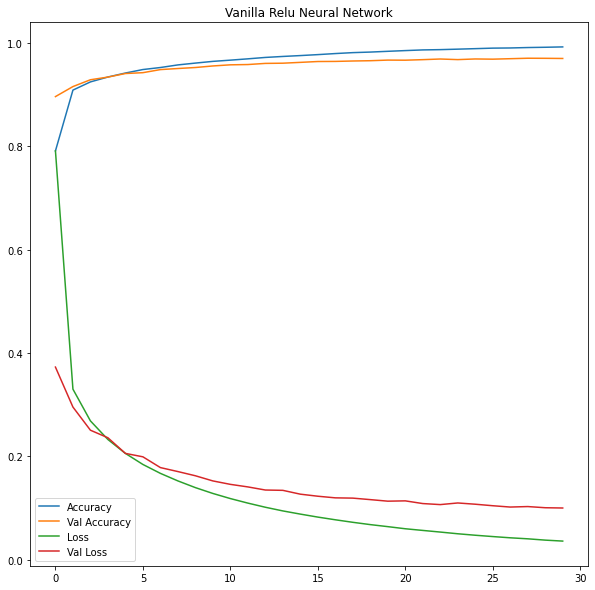

In [0]:
plt.figure(figsize=(10,10))

plt.title('Vanilla Relu Neural Network')

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

## Conclusion 

- Sigmoid is a slow learner 
- Sigmoid also overfits less
- Rectified Linear Unit is a fast learner
- Rectified Linear Unit overfits more

# Convolution Neural Networks



## Regularisation

## Weight Regularisation
Since we have seen what activation is good. In this section we try observe the function of regularisation i.e. L1 and L2. 

The function of regularisation is to ensure the weights are distributed properly in order to avoid overfitting. 

Overfitting is where the model is complex to learn the underlying patterns of the data. Generally, complexity arises due to the weight distribution in the model. Model needs to be balanced not too simple and not too complex. Most of the time model with huge input data tends to overfit and model with less input data tends to underfit. 

Our aim is to reduce the overfitting. We can achieve this by constraining on the complexity of the model. This is the purpose of regularisation. 

In [0]:
#Setting right dimension
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [0]:
conv = keras.models.Sequential()
conv.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
conv.add(keras.layers.MaxPooling2D((2,2)))
conv.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
conv.add(keras.layers.MaxPooling2D(2,2))

conv.add(keras.layers.Flatten())
conv.add(keras.layers.Dense(100, activation='relu'))
conv.add(keras.layers.Dense(10, activation='softmax'))

conv.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_8 (Dense)              (None, 10)              

In [0]:
conv.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])


history=conv.fit(X_train[:40000], y_train[:40000],
                   epochs=30, validation_data=(X_train[40000:], y_train[40000:]))

Train on 40000 samples, validate on 20000 samples
Epoch 1/30
40000/40000 [==============================] - 13s 336us/step - loss: 0.6867 - acc: 0.7948 - val_loss: 0.2316 - val_acc: 0.9292
Epoch 2/30
40000/40000 [==============================] - 9s 223us/step - loss: 0.1983 - acc: 0.9407 - val_loss: 0.1530 - val_acc: 0.9546
Epoch 3/30
40000/40000 [==============================] - 9s 223us/step - loss: 0.1316 - acc: 0.9598 - val_loss: 0.1279 - val_acc: 0.9600
Epoch 4/30
40000/40000 [==============================] - 9s 225us/step - loss: 0.1020 - acc: 0.9685 - val_loss: 0.1091 - val_acc: 0.9665
Epoch 5/30
40000/40000 [==============================] - 9s 224us/step - loss: 0.0838 - acc: 0.9746 - val_loss: 0.0967 - val_acc: 0.9690
Epoch 6/30
40000/40000 [==============================] - 9s 225us/step - loss: 0.0725 - acc: 0.9771 - val_loss: 0.0815 - val_acc: 0.9747
Epoch 7/30
40000/40000 [==============================] - 9s 223us/step - loss: 0.0644 - acc: 0.9798 - val_loss: 0.0855 -

In [0]:
conv.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 84us/step


[0.041154588781016355, 0.987]

In [0]:
import pandas as pd

CNN = pd.DataFrame(history.history)
CNN.head()

,val_loss,val_acc,loss,acc
0,0.231574,0.92920,0.686652,0.79475
1,0.153028,0.95465,0.198349,0.94070
2,0.127944,0.96005,0.131644,0.95985
3,0.109129,0.96650,0.102011,0.96850
4,0.096674,0.96900,0.083778,0.97460


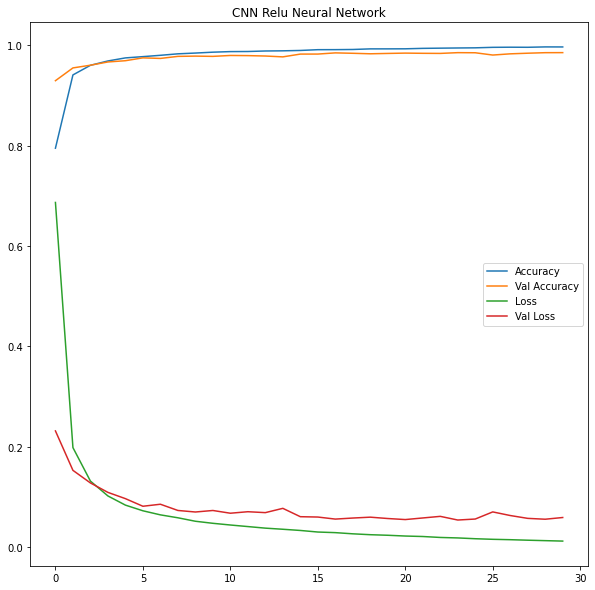

In [0]:
plt.figure(figsize=(10,10))

plt.title('CNN Relu Neural Network')

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

In [0]:
conv = keras.models.Sequential()
conv.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
conv.add(keras.layers.MaxPooling2D((2,2)))
conv.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
conv.add(keras.layers.MaxPooling2D(2,2))

conv.add(keras.layers.Flatten())
conv.add(keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
conv.add(keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.001), activation='softmax'))

conv.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. In other words the mean square error will be multiplied by the number 0.001. 

We can also use L1 and L2 norms simultaneously. 

In [0]:
conv.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])


history=conv.fit(X_train[:40000], y_train[:40000],
                   epochs=30, validation_data=(X_train[40000:], y_train[40000:]))

Train on 40000 samples, validate on 20000 samples
Epoch 1/30
40000/40000 [==============================] - 10s 245us/step - loss: 4.5723 - acc: 0.8247 - val_loss: 3.2882 - val_acc: 0.9271
Epoch 2/30
40000/40000 [==============================] - 9s 236us/step - loss: 2.4982 - acc: 0.9385 - val_loss: 1.8313 - val_acc: 0.9355
Epoch 3/30
40000/40000 [==============================] - 10s 240us/step - loss: 1.2886 - acc: 0.9538 - val_loss: 0.8666 - val_acc: 0.9578
Epoch 4/30
40000/40000 [==============================] - 9s 237us/step - loss: 0.6241 - acc: 0.9553 - val_loss: 0.4308 - val_acc: 0.9603
Epoch 5/30
40000/40000 [==============================] - 9s 236us/step - loss: 0.3760 - acc: 0.9560 - val_loss: 0.4030 - val_acc: 0.9340
Epoch 6/30
40000/40000 [==============================] - 9s 235us/step - loss: 0.3178 - acc: 0.9586 - val_loss: 0.3024 - val_acc: 0.9588
Epoch 7/30
40000/40000 [==============================] - 9s 234us/step - loss: 0.2877 - acc: 0.9612 - val_loss: 0.2916 

In [0]:
conv.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 85us/step


[0.16601712918281555, 0.976]

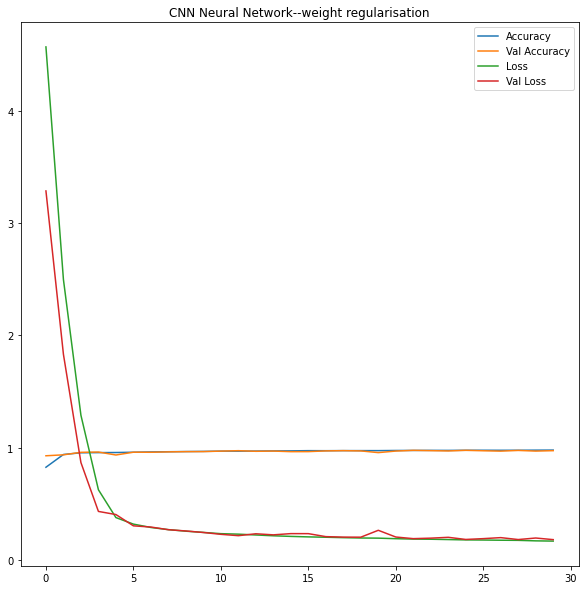

In [0]:
plt.figure(figsize=(10,10))

plt.title('CNN Neural Network--weight regularisation')

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

As we can see the from both the graphs that overfitting is reduced when we use regularisation. 



## Dropout Regularisation

The Dropout Regularisation will randomly remove output from the neuron. This is usually set to 0.2 or 0.5 meaning that these fraction of output will return zeros. 

In [0]:
conv = keras.models.Sequential()
conv.add(keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
conv.add(keras.layers.MaxPool2D(2,2))
conv.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
conv.add(keras.layers.MaxPool2D(2,2))
conv.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
conv.add(keras.layers.MaxPool2D(2,2))

conv.add(keras.layers.Flatten())
conv.add(keras.layers.Dense(300, activation='relu'))
conv.add(keras.layers.Dropout(0.2))
conv.add(keras.layers.Dense(100))
conv.add(keras.layers.Dropout(0.2))
conv.add(keras.layers.Dense(10, activation='softmax'))


conv.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 128)         0         
____

In [0]:
conv.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])


history=conv.fit(X_train[:40000], y_train[:40000],
                   epochs=20, validation_data=(X_train[40000:], y_train[40000:]))

Train on 40000 samples, validate on 20000 samples
Epoch 1/20
40000/40000 [==============================] - 12s 307us/step - loss: 1.1490 - acc: 0.6299 - val_loss: 0.3081 - val_acc: 0.9062
Epoch 2/20
40000/40000 [==============================] - 12s 293us/step - loss: 0.2663 - acc: 0.9181 - val_loss: 0.1671 - val_acc: 0.9479
Epoch 3/20
40000/40000 [==============================] - 12s 293us/step - loss: 0.1754 - acc: 0.9455 - val_loss: 0.1523 - val_acc: 0.9518
Epoch 4/20
40000/40000 [==============================] - 12s 298us/step - loss: 0.1386 - acc: 0.9576 - val_loss: 0.1147 - val_acc: 0.9654
Epoch 5/20
40000/40000 [==============================] - 12s 295us/step - loss: 0.1178 - acc: 0.9630 - val_loss: 0.0931 - val_acc: 0.9716
Epoch 6/20
40000/40000 [==============================] - 12s 293us/step - loss: 0.1004 - acc: 0.9687 - val_loss: 0.0935 - val_acc: 0.9714
Epoch 7/20
40000/40000 [==============================] - 12s 291us/step - loss: 0.0899 - acc: 0.9727 - val_loss: 0.

In [0]:
conv.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 102us/step


[0.05738108071723837, 0.9822]

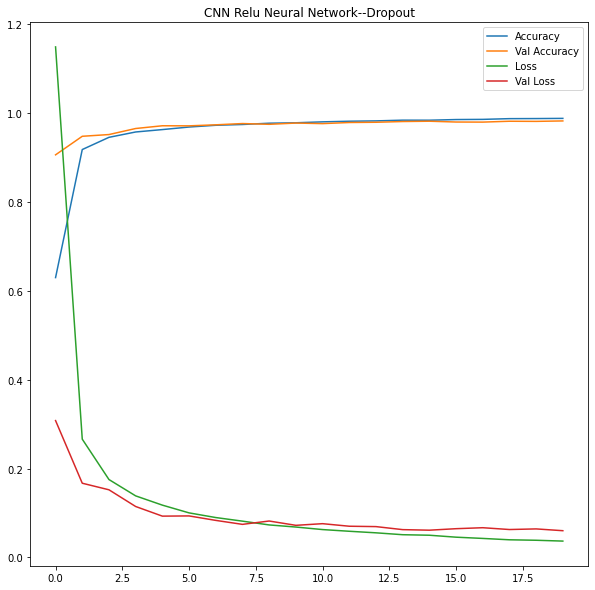

In [0]:
plt.figure(figsize=(10,10))

plt.title('CNN Relu Neural Network--Dropout')

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

In [0]:
conv = keras.models.Sequential()
conv.add(keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
conv.add(keras.layers.MaxPool2D(2,2))
conv.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
conv.add(keras.layers.MaxPool2D(2,2))
conv.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
conv.add(keras.layers.MaxPool2D(2,2))

conv.add(keras.layers.Flatten())
conv.add(keras.layers.Dense(300, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
conv.add(keras.layers.Dropout(0.2))
conv.add(keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
conv.add(keras.layers.Dropout(0.2))
conv.add(keras.layers.Dense(10, activation='softmax'))

conv.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)              

In [0]:
conv.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])


history=conv.fit(X_train[:40000], y_train[:40000],
                   epochs=20, validation_data=(X_train[40000:], y_train[40000:]))

Train on 40000 samples, validate on 20000 samples
Epoch 1/20
40000/40000 [==============================] - 13s 322us/step - loss: 5.5101 - acc: 0.4758 - val_loss: 3.9339 - val_acc: 0.8593
Epoch 2/20
40000/40000 [==============================] - 12s 306us/step - loss: 3.4301 - acc: 0.8869 - val_loss: 2.8663 - val_acc: 0.9324
Epoch 3/20
40000/40000 [==============================] - 12s 305us/step - loss: 2.5320 - acc: 0.9232 - val_loss: 2.0978 - val_acc: 0.9504
Epoch 4/20
40000/40000 [==============================] - 12s 307us/step - loss: 1.8441 - acc: 0.9382 - val_loss: 1.5087 - val_acc: 0.9541
Epoch 5/20
40000/40000 [==============================] - 12s 303us/step - loss: 1.3119 - acc: 0.9446 - val_loss: 1.0605 - val_acc: 0.9538
Epoch 6/20
40000/40000 [==============================] - 12s 306us/step - loss: 0.9136 - acc: 0.9480 - val_loss: 0.7270 - val_acc: 0.9566
Epoch 7/20
40000/40000 [==============================] - 12s 306us/step - loss: 0.6450 - acc: 0.9490 - val_loss: 0.

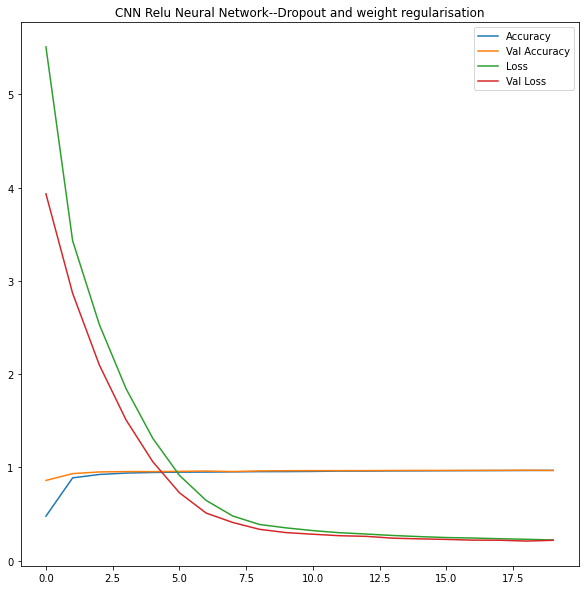

In [0]:
plt.figure(figsize=(10,10))

plt.title('CNN Relu Neural Network--Dropout and weight regularisation')

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

In [0]:
conv.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 103us/step


[0.20924387202262879, 0.9674]